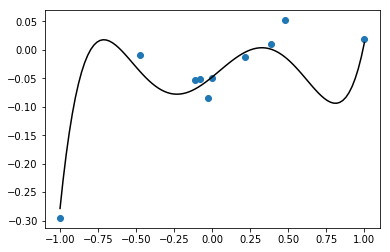

In [113]:
# generate training data
import numpy as np
n = 10 # sample size
x = np.random.uniform(-1,1,n) #sample input data
x = np.sort(x)
x[0]=-1
x[n-1]=1

# ground truth is 5-th order polynomial and we add Gaussian noise to it
y = (x-.99)*(x-.4)*(x-.25)*(x+.6)*(x+.8) + .03*np.random.randn(n)

# plot the samples and grounstruth
t = np.linspace(-1,1,100)
y0 = (t-.99)*(t-.4)*(t-.25)*(t+.6)*(t+.8)
import matplotlib.pyplot as plt
plt.plot(x,y,'o')
plt.plot(t,y0,'k-')
plt.show()

1-NN (1-nearest neighbor) method for regression and degree-3 polynomial regression

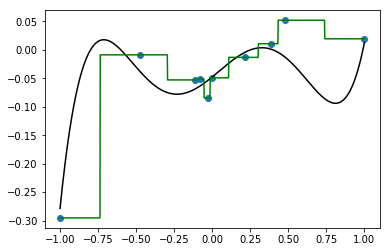

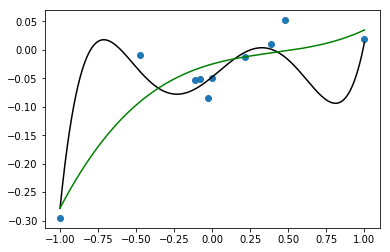

In [114]:
# 1-NN
t = np.linspace(-1,1,1000)
ynn = np.zeros(np.size(t))
for i in np.linspace(0,np.size(t)-1,np.size(t)):
    z = np.abs(t[int(i)]-x)
    idx = np.argmin(z)
    ynn[int(i)] = y[int(idx)]

y0 = (t-.99)*(t-.4)*(t-.25)*(t+.6)*(t+.8)
import matplotlib.pyplot as plt
plt.plot(x,y,'o')
plt.plot(t,y0,'k-')
plt.plot(t,ynn,'g-')
plt.show()

# degree-3 polynomial
# create a data matrix X
p=3
X = np.vstack([np.ones(len(x)),x,x**2,x**3]).T
# degree-p polynomial linear regression
w3 = np.array(p+1)
w3 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
yh3= np.matmul(X,w3)

plt.plot(x,y,'o')
plt.plot(t,y0,'k-')
T = np.vstack([np.ones(len(t)),t,t**2,t**3]).T
plt.plot(t, np.matmul(T,w3), 'g')
plt.show()

# increasing sample size for a complex predictor (1-NN) and a simple predictor (degree-3 polynomial)
Let's increase the sample size from 10 gradually to 100 and see how the predictor changes

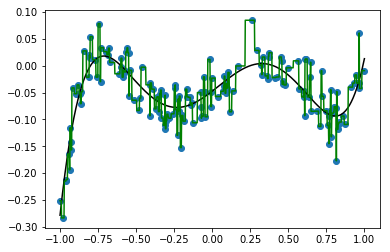

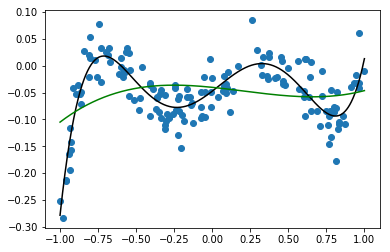

In [129]:
# generate training data
import numpy as np
n = n+10 # sample size
x = np.random.uniform(-1,1,n) #sample input data
x = np.sort(x)
x[0]=-1
x[n-1]=1

# ground truth is 5-th order polynomial and we add Gaussian noise to it
y = (x-.99)*(x-.4)*(x-.25)*(x+.6)*(x+.8) + .03*np.random.randn(n)

# plot the samples and grounstruth
t = np.linspace(-1,1,100)
y0 = (t-.99)*(t-.4)*(t-.25)*(t+.6)*(t+.8)

# 1-NN
t = np.linspace(-1,1,1000)
ynn = np.zeros(np.size(t))
for i in np.linspace(0,np.size(t)-1,np.size(t)):
    z = np.abs(t[int(i)]-x)
    idx = np.argmin(z)
    ynn[int(i)] = y[int(idx)]

y0 = (t-.99)*(t-.4)*(t-.25)*(t+.6)*(t+.8)
import matplotlib.pyplot as plt
plt.plot(x,y,'o')
plt.plot(t,y0,'k-')
plt.plot(t,ynn,'g-')
plt.show()

# degree-3 polynomial
# create a data matrix X
p=3
X = np.vstack([np.ones(len(x)),x,x**2,x**3]).T
# degree-p polynomial linear regression
w3 = np.array(p+1)
w3 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
yh3= np.matmul(X,w3)

plt.plot(x,y,'o')
plt.plot(t,y0,'k-')
T = np.vstack([np.ones(len(t)),t,t**2,t**3]).T
plt.plot(t, np.matmul(T,w3), 'g')
plt.show()

## the fact that 1-NN converges (in large samplesize limit) to the groundtruth means it has small BIAS, and the fact that degree-3 polynomial does not converge means that it has large BIAS

### let's plot for multiple instances and see how they change over instances of fresh data sets

In [130]:
n = 30 # sample size
run=0
t = np.linspace(-1,1,1000)
ynn = np.zeros((100,np.size(t)))
ypoly = np.zeros((100,np.size(t)))

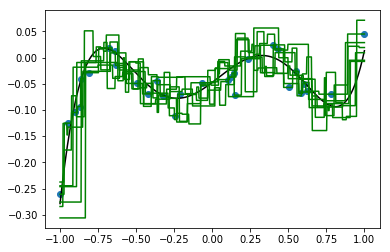

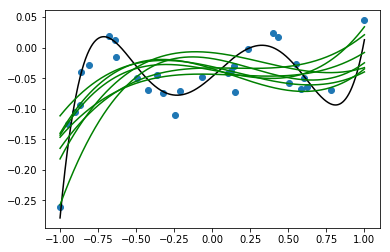

In [138]:
# generate training data
import numpy as np
x = np.random.uniform(-1,1,n) #sample input data
x = np.sort(x)
x[0]=-1
x[n-1]=1

# ground truth is 5-th order polynomial and we add Gaussian noise to it
y = (x-.99)*(x-.4)*(x-.25)*(x+.6)*(x+.8) + .03*np.random.randn(n)

# plot the samples and grounstruth
y0 = (t-.99)*(t-.4)*(t-.25)*(t+.6)*(t+.8)

# 1-NN
for i in np.linspace(0,np.size(t)-1,np.size(t)):
    z = np.abs(t[int(i)]-x)
    idx = np.argmin(z)
    ynn[run][int(i)] = y[int(idx)]

y0 = (t-.99)*(t-.4)*(t-.25)*(t+.6)*(t+.8)
import matplotlib.pyplot as plt
plt.plot(x,y,'o')
plt.plot(t,y0,'k-')
for irun in np.linspace(0,run,run):
    plt.plot(t,ynn[int(irun)],'g-')
plt.show()

# degree-3 polynomial
# create a data matrix X
p=3
X = np.vstack([np.ones(len(x)),x,x**2,x**3]).T
# degree-p polynomial linear regression
w3 = np.array(p+1)
w3 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
yh3= np.matmul(X,w3)

plt.plot(x,y,'o')
plt.plot(t,y0,'k-')
T = np.vstack([np.ones(len(t)),t,t**2,t**3]).T
ypoly[run] = np.matmul(T,w3) 
for irun in np.linspace(0,run,run):
    plt.plot(t, ypoly[int(irun)], 'g')
plt.show()
run=run+1

## the fact that 1-NN varies a lot over fresh sample instances means it has large VARIANCE, and the fact that degree-3 polynomial does not vary a lot means that it has small VARIANCE 